<img alt="Colaboratory logo" width="100%" src="https://github.com/fabhbarbosa/Analise-dados-Airbnb-Los-Angeles/blob/main/cover.png?raw=true">


# Análise dos Dados do Airbnb - Los Angeles - USA

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, mesmo que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Segundo dados de agosto de 2022, a Statrup conta com **4 milhões de anfitriões** que já receberam **mais de 1,5 bilhão de hóspedes** em quase todos os países do mundo.


Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Neste *notebook*, iremos analisar os dados referentes à cidade de Los Angeles nos Estados Unidos, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Los Angeles*

In [1]:
# importar pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importar o arquivo csv para um dataframe

df = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2023-09-03/visualisations/listings.csv')

## Análise Inicial de Dados
Esta fase tem como propósito promover uma análise preliminar dos dados, proporcionando um contexto inicial para compreender a estrutura dos mesmos.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` O número de avaliações que o anúncio possui (nos últimos 12 meses).
* `licence`- licença

In [3]:
# verificar o cabeçalho:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,930487087555321292,Home in La Puente · ★New · 1 bedroom · 1 bed ·...,482579539,Yahide,Unincorporated Areas,Rowland Heights,33.979625,-117.880993,Private room,35,1,0,NaN,NaN,9,0,0,NaN
1,906882865272179753,Home in Bell · 1 bedroom · 1 bed · 2 baths,390414536,Paulo,Other Cities,Bell,33.981930,-118.200480,Private room,80,1,0,NaN,NaN,91,364,0,NaN
2,942342470598573002,Home in Rowland Heights · ★New · 1 bedroom · 2...,495867643,Lin,Unincorporated Areas,Rowland Heights,33.978508,-117.898650,Private room,69,1,0,NaN,NaN,4,359,0,NaN
3,632034182071149887,Condo in Beverly Hills · 2 bedrooms · 2 beds ·...,232012515,Mojdeh,Other Cities,Beverly Hills,34.070534,-118.388000,Private room,450,1,0,NaN,NaN,1,180,0,NaN
4,41240375,Condo in Los Angeles · 1 bedroom · 1 bed · 1.5...,21981097,Paola,City of Los Angeles,Playa del Rey,33.956730,-118.438200,Entire home/apt,120,30,1,2021-06-12,0.04,1,361,0,NaN


## Análise dos atributos (variáveis), qual é o tipo e quantos registros o conjunto de dados possui

Identificar a quantidade de entradas que o conjunto de dados possui e ver os tipos de cada coluna do dataframe


In [4]:
# identificar o volume de dados do dataframe
print('--------------------------------------------')
print('Quantidade de variáveis:\t {}'.format(df.shape[0]))
print('Quantidade de entradas:\t\t {}'.format(df.shape[1]))
print('--------------------------------------------')
print('Colunas do dataframe e tipo de dados')
display(df.dtypes)

--------------------------------------------
Quantidade de variáveis:	 44594
Quantidade de entradas:		 18
--------------------------------------------
Colunas do dataframe e tipo de dados


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

## Análise do percentual de valores ausentes

A qualidade de um conjunto de dados está diretamente ligada à presença de valores ausentes. É fundamental avaliar inicialmente se essas omissões de dados têm relevância em relação ao conjunto total de registros.


In [5]:
# quantidade de valores ausentes das variáveis por ordem decrescente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.740952
reviews_per_month                 0.260842
last_review                       0.260842
host_name                         0.000045
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### Tipo de distribuição das variáveis?

Para a identificação da distribuição das variáveis, será gerado um histograma para facilitar a análise.

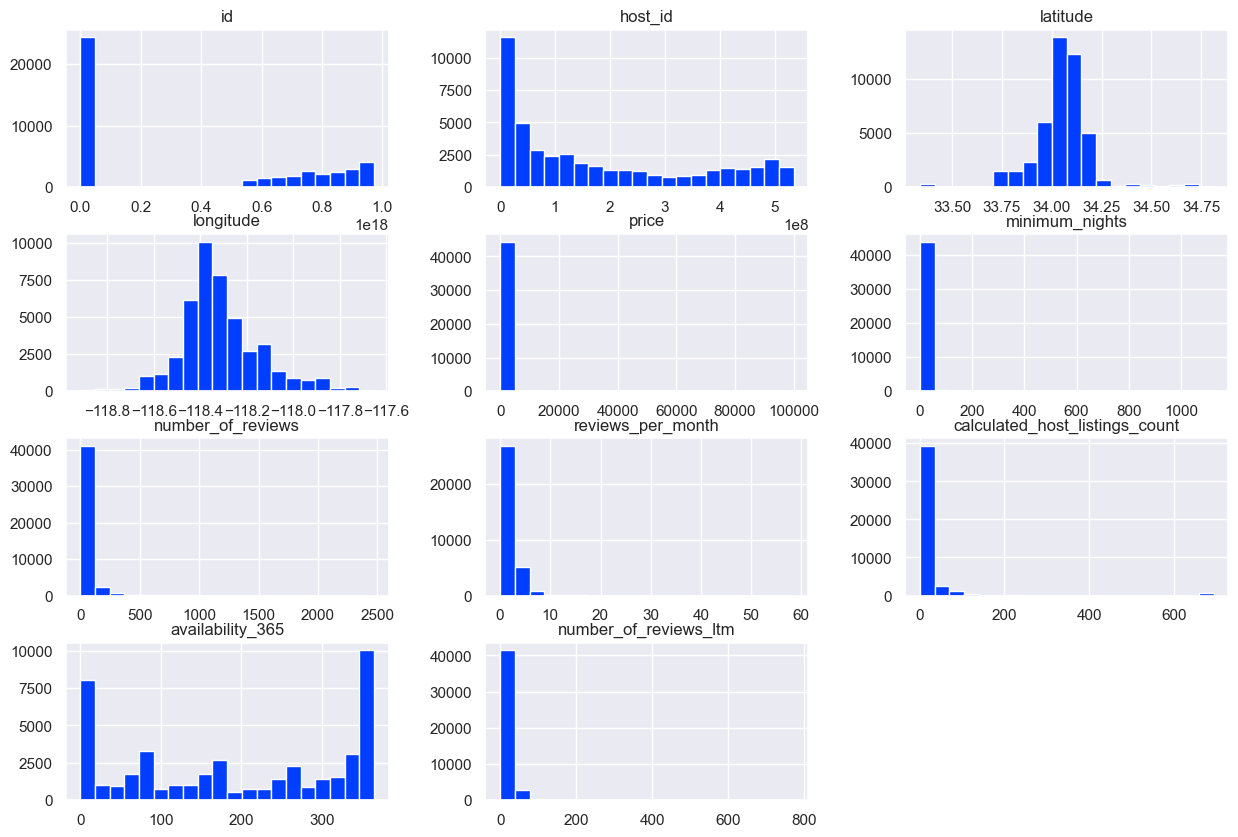

In [6]:
#setar estilo seaborn
sns.set_theme(style='dark', palette='bright', context='notebook')

# plotar um histograma com as variáveis numéricas
df.hist(bins=20, figsize=(15,10));

### Checagem da presença de outliers

Pela distribuição do histograma, é possível verificar se há *outliers*. As variáveis `price`, `minimum_nights` e `calculated_host_listings_count` tem valores com esse indício.

Os valores não tem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [7]:
# avaliar as colunas numéricas
colunas_numericas = df.select_dtypes(include='number').columns
print(colunas_numericas)

# resumo estatístico das variáveis numéricas
df[['price',     'minimum_nights','number_of_reviews',
    'reviews_per_month','calculated_host_listings_count', 
    'availability_365',]].describe()

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,44594.000000,44594.000000,44594.000000,32962.000000,44594.000000,44594.000000
mean,291.850137,17.728439,34.375140,1.509050,23.090775,195.614567
std,934.537290,28.661772,75.633272,1.777512,88.289895,137.700081
min,7.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,91.000000,2.000000,0.000000,0.230000,1.000000,66.000000
50%,150.000000,7.000000,5.000000,0.830000,2.000000,191.000000
75%,252.000000,30.000000,31.000000,2.300000,10.000000,339.000000
max,99999.000000,1124.000000,2472.000000,58.490000,692.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 252, porém seu valor máximo é 99999.
* A quantidade máxima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.

#### Boxplot para price e minimum_nights


Price: Valores acima de 600
956 entradas
Percentual = 2.144%


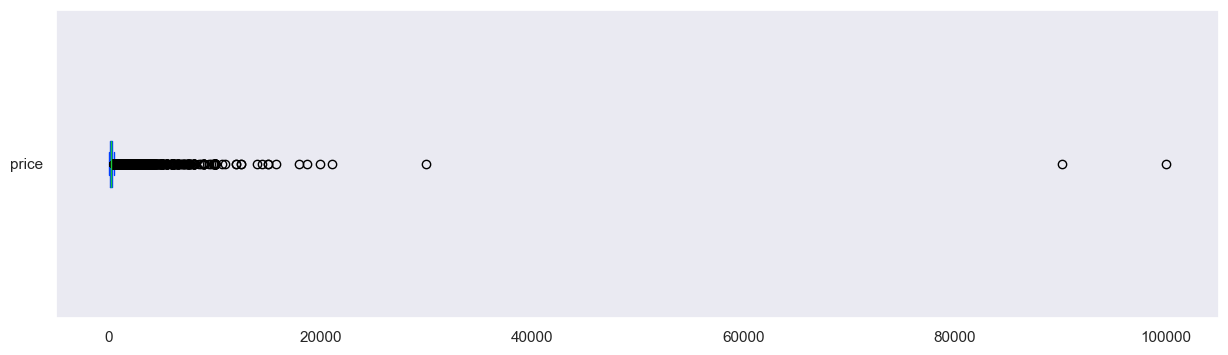


Minimum Nights: Valores acima de 30 dias
5506 entradas
Percentual = 0.220%


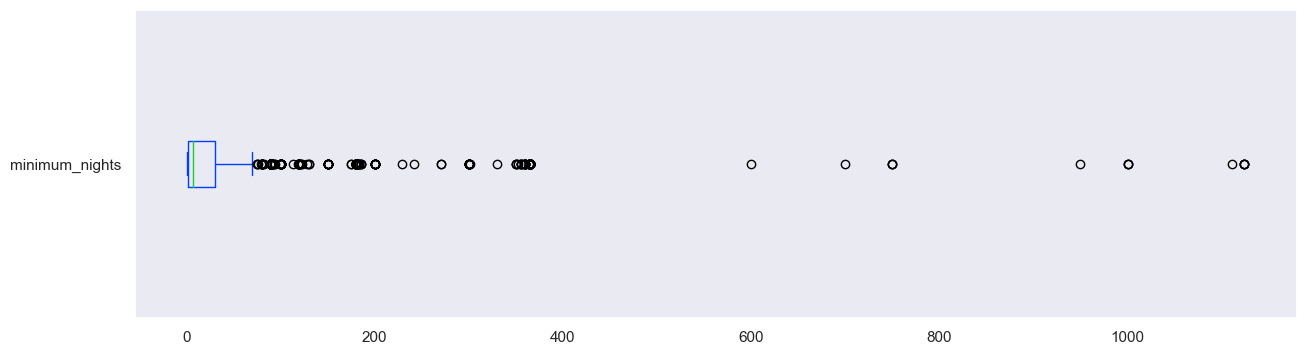

In [8]:
# analisar a quantidade de valores acima de 1500 para price
print('\nPrice: Valores acima de 600')
print('{} entradas'.format(len(df[df.price>1500])))
print('Percentual = {:.3f}%'.format((len(df[df.price>1500]) / df.shape[0])*100))

# price
df.price.plot(kind='box', vert=False, figsize=(15,4))
plt.show()


# analisar a quantidade de valores acima de 30 para minimum_nights
print('\nMinimum Nights: Valores acima de 30 dias')
print('{} entradas'.format(len(df[df.minimum_nights>30])))
print('Percentual = {:.3f}%'.format((len(df[df.minimum_nights>300]) / df.shape[0])*100))

# price
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,4))
plt.show()


#### Histogramas com *outliers* desconsiderados


Uma vez que foram identificados outliers nas variáveis `price` e `minimum_nights`, serão desconsiderados com a remoção destes valores do DataFrame e, em seguida, será gerado um novo histograma.

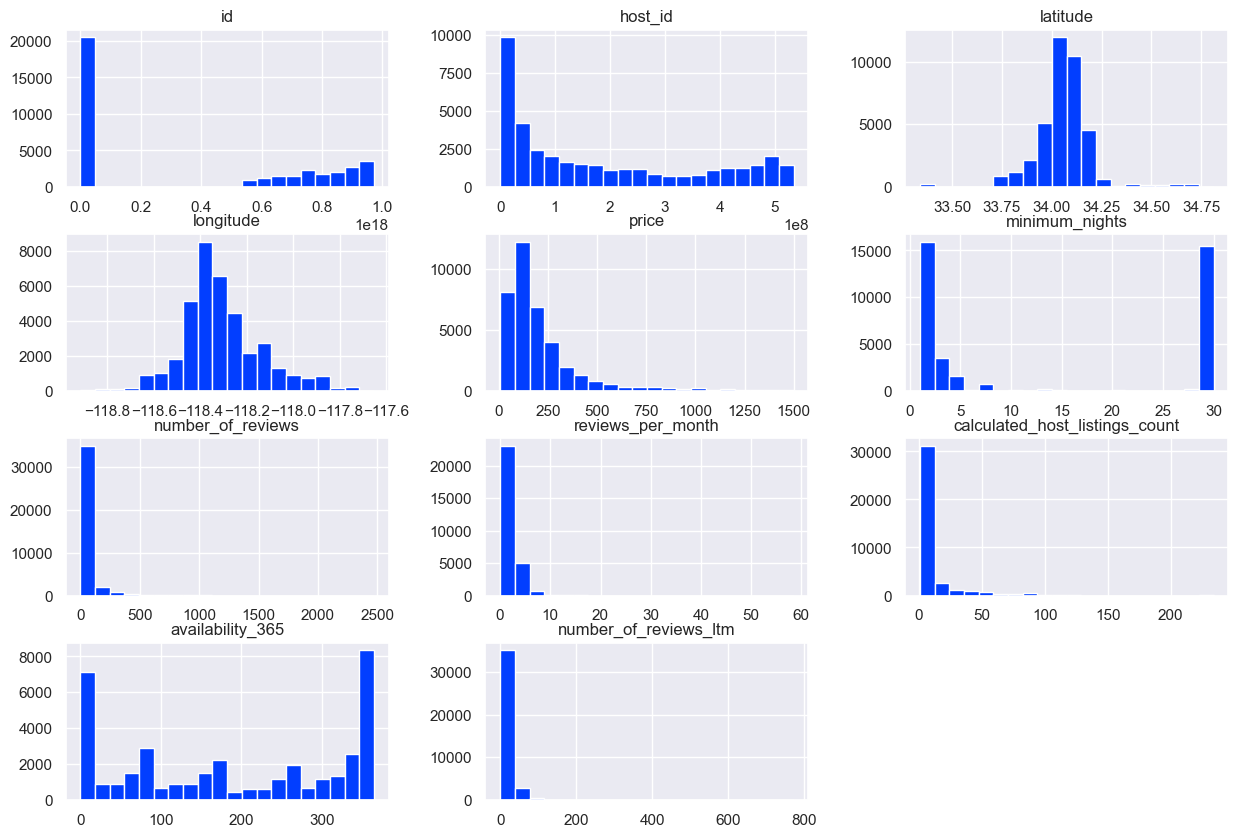

In [9]:
# remover os outliers em um novo dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar um histograma com as variáveis numéricas
df_clean.hist(bins=20, figsize=(15,10));


## Correlação existente entre as variáveis

Correlação significa que existe uma relação entre duas coisas. No contexto deste conjunto de dados, pode-se verificar a relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, será feito os seguintes passos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [10]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.071913,-0.066974,-0.016344,0.183794,0.095104,-0.037184
minimum_nights,-0.071913,1.000000,-0.193508,-0.451170,-0.012954,-0.034392,-0.395477
number_of_reviews,-0.066974,-0.193508,1.000000,0.562875,-0.112883,-0.021930,0.663432
reviews_per_month,-0.016344,-0.451170,0.562875,1.000000,-0.062535,0.066463,0.820484
calculated_host_listings_count,0.183794,-0.012954,-0.112883,-0.062535,1.000000,0.144280,-0.090711
availability_365,0.095104,-0.034392,-0.021930,0.066463,0.144280,1.000000,0.012394
number_of_reviews_ltm,-0.037184,-0.395477,0.663432,0.820484,-0.090711,0.012394,1.000000


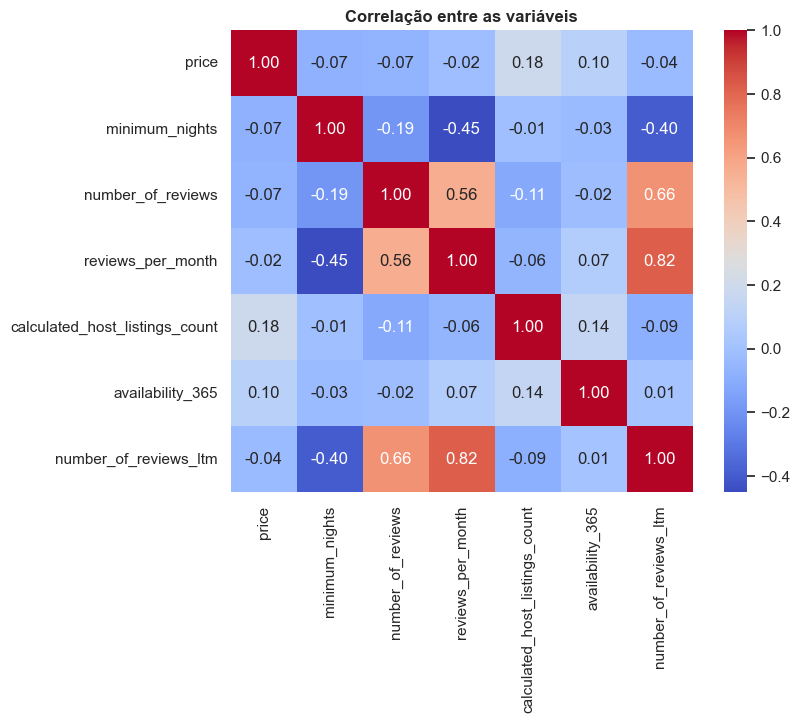

In [11]:
#criar um heatmap de correlação
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr, cmap='coolwarm', fmt='.2f', square=True, linecolor='white', annot=True);
plt.title("Correlação entre as variáveis", fontweight='bold')

# Exiba o heatmap
plt.show();

## Tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Caso já tenha visitado o aplicativo, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

A seguir, será analisado a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [12]:
# mostrar a quantidade de cada tipo de imóvel disponível
print(df_clean.room_type.value_counts())

print('---------------------------')

# percentual de cada tipo de imóvel disponível
print(df_clean.room_type.value_counts() / df_clean.shape[0])

Entire home/apt    27513
Private room        9976
Shared room          676
Hotel room            64
Name: room_type, dtype: int64
---------------------------
Entire home/apt    0.719689
Private room       0.260954
Shared room        0.017683
Hotel room         0.001674
Name: room_type, dtype: float64


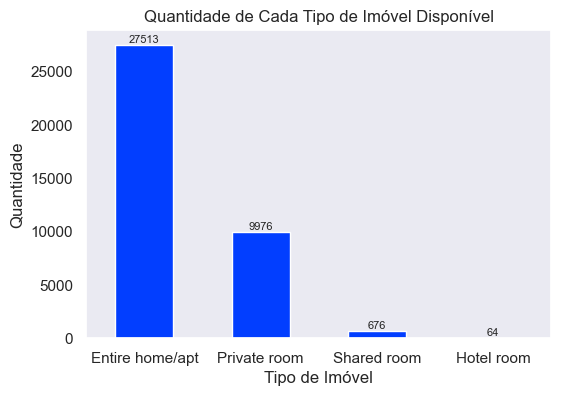

In [13]:
# Criar série de dados com a contagem de cada tipo de imóvel
room_type_counts = df_clean.room_type.value_counts()

# Crie o gráfico de barras
plt.figure(figsize=(6, 4))  
room_type_counts.plot(kind='bar')
plt.title('Quantidade de Cada Tipo de Imóvel Disponível')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Quantidade')
plt.xticks(rotation=0) 

# Adicionar rótulos de dados acima das barras
for i, v in enumerate(room_type_counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8)
    
plt.show()

## Qual a localidade mais cara em Los Angeles?

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. Para este caso, será feita uma comparação com os bairros (*neighbourhoods*) a partir do preço de locação.

In [14]:
# quais são as top10 localidades mais caras
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Malibu                                   676.316498
Lake View Terrace                        600.000000
Beverly Crest                            566.588785
Hollywood Hills West                     551.839912
Unincorporated Santa Monica Mountains    503.578035
Hidden Hills                             499.214286
Bel-Air                                  492.685714
Avalon                                   459.064677
Palos Verdes Estates                     454.952381
Pacific Palisades                        446.342105
Name: price, dtype: float64

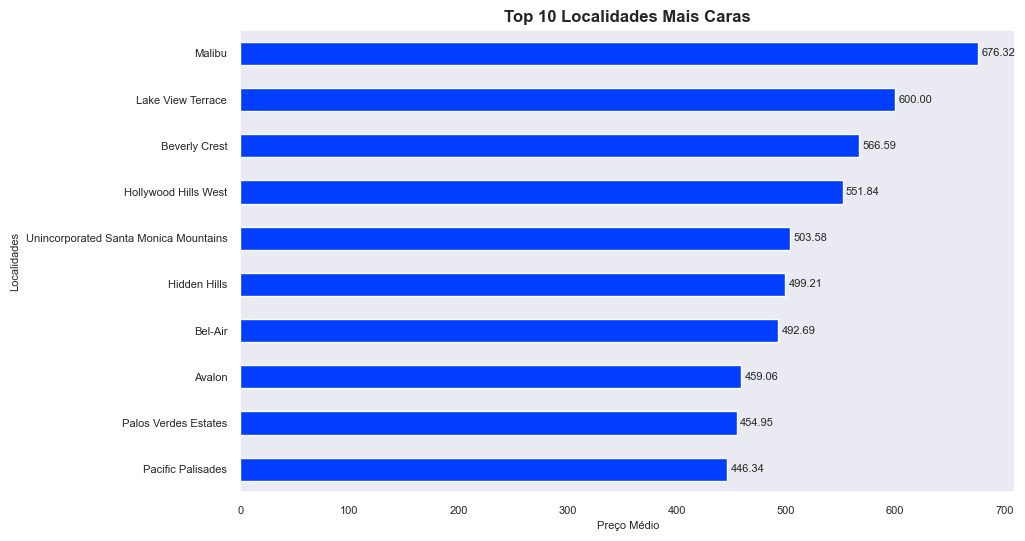

In [15]:
top_10_localities = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[-10:]

# criar o gráfico de colunas
plt.figure(figsize=(10, 6))  
top_10_localities.plot(kind='barh')
plt.title('Top 10 Localidades Mais Caras', fontweight='bold')
plt.ylabel('Localidades', fontsize=8)
plt.xlabel('Preço Médio', fontsize=8)
plt.xticks(rotation=0, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

label_padding = 3  # Ajuste de valor para controlar o espaçamento
for i, v in enumerate(top_10_localities):
    plt.text(v + label_padding, i, f'{v:.2f}', va='center', fontsize=8)
    
plt.show()

In [16]:
# analisar a quantidade de imóveis em Malibu
print(df[df.neighbourhood == 'Malibu'].shape)

df[df.neighbourhood == 'Malibu']

(429, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
137,42331295,Home in Malibu · ★4.76 · 1 bedroom · 3 beds · ...,324653379,Dean,Other Cities,Malibu,34.036950,-118.612050,Entire home/apt,672,3,51,2022-08-20,1.21,3,0,0,STR22-0035
206,47945047,Home in Malibu · ★4.96 · 4 bedrooms · 4 beds ·...,16531699,Katherine,Other Cities,Malibu,34.027310,-118.836230,Entire home/apt,971,3,52,2023-08-20,1.81,1,104,34,STR21-0139
211,46106743,Home in Malibu · ★5.0 · 4 bedrooms · 4 beds · ...,14898804,Jaime,Other Cities,Malibu,34.039370,-118.695610,Entire home/apt,1500,3,5,2023-05-21,0.26,1,319,2,STR20-0063
241,820342441427516443,Home in Malibu · 4 bedrooms · 4 beds · 2.5 baths,66458695,Paul,Other Cities,Malibu,34.035935,-118.711168,Entire home/apt,866,7,0,NaN,NaN,1,89,0,STR87-5941
437,45116281,Home in Malibu · 6 bedrooms · 6 beds · 4 baths,71030757,Yoni,Other Cities,Malibu,34.022240,-118.803190,Entire home/apt,991,30,0,NaN,NaN,33,365,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42253,45996025,Home in Malibu · ★4.84 · 3 bedrooms · 3 beds ·...,9193782,Lisa,Other Cities,Malibu,34.046050,-118.645740,Entire home/apt,811,3,64,2023-08-19,1.90,3,206,25,STR21-0036
42269,940924521861421130,Rental unit in Malibu · ★5.0 · 2 bedrooms · 3 ...,11271580,Brian,Other Cities,Malibu,34.038087,-118.637063,Entire home/apt,488,1,3,2023-08-07,2.37,3,352,3,STR22-0123
42293,44861286,Home in Malibu · ★4.96 · 4 bedrooms · 4 beds ·...,5802360,Joubin,Other Cities,Malibu,34.039080,-118.648580,Entire home/apt,1400,3,45,2023-08-21,1.25,1,90,14,STR21-0217
42314,651462734313710407,Home in Malibu · ★5.0 · 3 bedrooms · 3 beds · ...,85191394,Emalie & Brian,Other Cities,Malibu,34.045150,-118.636780,Entire home/apt,778,2,10,2023-03-12,0.74,4,300,6,STR22-0056


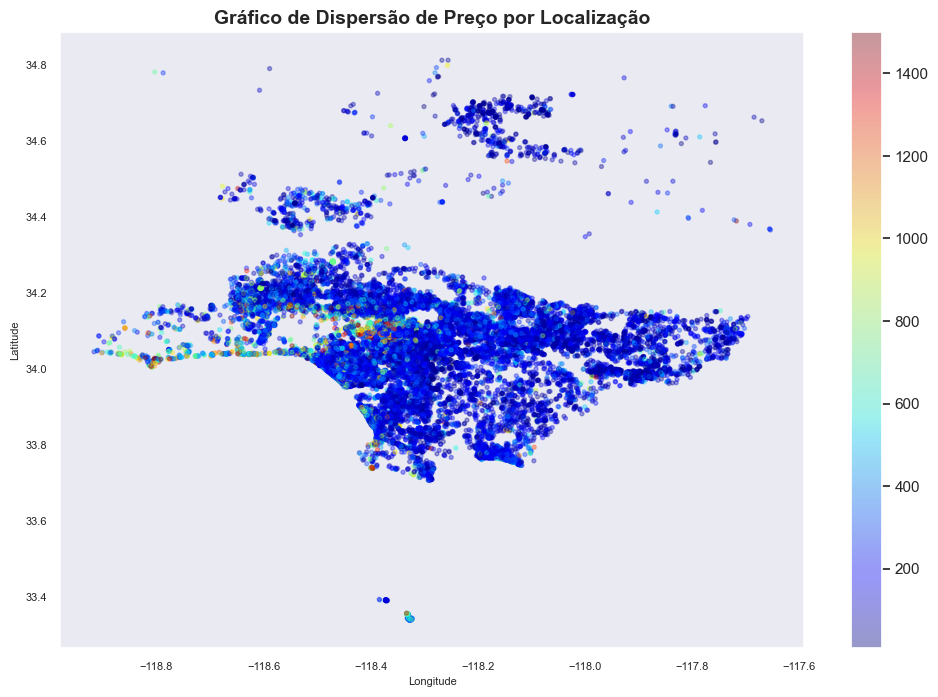

In [17]:
#plotar os imóveis por latitude e longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.35, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));

plt.title('Gráfico de Dispersão de Preço por Localização', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.ylabel('Latitude', fontsize=8)
plt.xlabel('Longitude', fontsize=8)
plt.show();

## Conclusão

Embora tenha sido realizada apenas uma análise superficial dos dados do Airbnb, já é evidente a presença de outliers em algumas variáveis.

Além disso, observou-se que em determinadas localidades, a disponibilidade limitada de imóveis pode distorcer as estatísticas de certos atributos.

Por último, é importante destacar que o conjunto de dados utilizado é uma versão resumida, destinada principalmente a uma abordagem inicial. Recomenda-se o uso do conjunto de dados completo, que conta com 106 atributos disponíveis, para uma análise exploratória mais abrangente em análises subsequentes.